In [4]:
import numpy as np
import random

nested_list = [random.randint(1,10) for i in range(50)]
matrix1 = np.array([nested_list])
print('matrix1:\n', matrix1)

matrix2 = matrix1.reshape(5,10)
print('matrix2:\n', matrix2, '\n')

print('1: ', matrix2[:,0])    # first column
print('2: ', matrix2[0,:])    # first row
print('3:\n', matrix2[0:3,0:3])    # gives 3x3 matrix
print('4:', matrix2[3,0:3])
print('4:', type(matrix2[3,0:3]))
print('5:', matrix2[3:4,0:3])
print('5:', type(matrix2[3:4,0:3]))

matrix1:
 [[ 6  9  5  6  2  1  5  6 10  6  6 10  8  4  2  4  6  6  3  1  1  6 10  1
   7  3  5  6  1  7  3  9  1 10 10  1  9  7  4 10  8  9  8  9  1  7  1  9
   7 10]]
matrix2:
 [[ 6  9  5  6  2  1  5  6 10  6]
 [ 6 10  8  4  2  4  6  6  3  1]
 [ 1  6 10  1  7  3  5  6  1  7]
 [ 3  9  1 10 10  1  9  7  4 10]
 [ 8  9  8  9  1  7  1  9  7 10]] 

1:  [6 6 1 3 8]
2:  [ 6  9  5  6  2  1  5  6 10  6]
3:
 [[ 6  9  5]
 [ 6 10  8]
 [ 1  6 10]]
4: [3 9 1]
4: <class 'numpy.ndarray'>
5: [[3 9 1]]
5: <class 'numpy.ndarray'>


# Q1 Confusion Matrix
Calculate accuracy, sensitivity and false positive rate.<br>
<br>
Accuracy = total correct predictions / total records <br>
Sensitivity = total correct positive cases / total positive cases (aka recall )<br>
False positive rate = total false positives / total negative cases(the actual negative cases that have been predicted to be positive)

In [14]:
def get_metrics(actual, predicted, labels):
    metrics = {'confusion matrix': '', 'total records':'','accuracy':'','sensitivity':'','false positive rate':''}
        
    g1,g2,g3,g4 = (0,0,0,0)
    
    for i,item in enumerate(actual):
        if item == 'bird':
            if predicted[i] == 'bird':
                g1 += 1
            elif predicted[i] == 'cat':
                g2 += 1        
        elif item == 'cat':
            if predicted[i] == 'bird':
                g3 += 1
            elif predicted[i] == 'cat':
                g4 += 1
    if labels[1] == 'cat':
        correct_posi = g4
        total_posi = g3+g4
        false_posi = g2
        total_nega = g1+g2
    elif labels[1] == 'bird':
        correct_posi = g1
        total_posi = g1+g2
        false_posi = g3
        total_nega = g3+g4
    # print(g1,g2,g3,g4)
    
    conf_matrix = np.array([g1,g2,g3,g4])
    metrics['confusion matrix'] = conf_matrix.reshape(2,2)
    metrics['total records'] = len(actual)
    metrics['accuracy'] = round((g1+g4)/len(actual),3)
    metrics['sensitivty'] = round(correct_posi/total_posi,3)
    metrics['false positive rate'] = round(false_posi/total_nega,3)
    return metrics

actual = [ 'cat' , 'cat' , 'cat' , 'cat' , 'bird' , 'bird' , 'bird' , 'bird' ]
predicted = [ 'cat' , 'cat' , 'bird' , 'bird' , 'cat' , 'bird' , 'bird' , 'bird'
]
labels = [ 'bird' , 'cat' ]
print(get_metrics(actual, predicted, labels) )

{'confusion matrix': array([[3, 1],
       [2, 2]]), 'total records': 8, 'accuracy': 0.625, 'sensitivity': '', 'false positive rate': 0.25, 'sensitivty': 0.5}


# Q2 Five Number Summary

In [5]:
import numpy as np

def five_number_summary(columns):
    # takes in numpy array, returns list of dictionaries
    ans = []
    for i in range(columns.shape[1]):
        col = columns[:,i]
        dct = {'maximum': 0, 'minimum':0, 'median':0, 'first quartile': 0,'third quartile':0}
        dct['maximum'] = np.max(col)
        dct['minimum'] = np.min(col)
        dct['median'] = np.median(col)
        dct['first quartile'] = np.percentile(col,25)
        dct['third quartile'] = np.percentile(col,75)
        ans.append(dct)
    return ans
    
from sklearn.datasets import load_breast_cancer
bunchobject = load_breast_cancer()

col_no = [0,1,2]
columns = bunchobject.data[:,col_no]
print(columns)
print(five_number_summary(columns))    

[[ 17.99  10.38 122.8 ]
 [ 20.57  17.77 132.9 ]
 [ 19.69  21.25 130.  ]
 ...
 [ 16.6   28.08 108.3 ]
 [ 20.6   29.33 140.1 ]
 [  7.76  24.54  47.92]]
[{'maximum': 28.11, 'minimum': 6.981, 'median': 13.37, 'first quartile': 11.7, 'third quartile': 15.78}, {'maximum': 39.28, 'minimum': 9.71, 'median': 18.84, 'first quartile': 16.17, 'third quartile': 21.8}, {'maximum': 188.5, 'minimum': 43.79, 'median': 86.24, 'first quartile': 75.17, 'third quartile': 104.1}]


# Q5 Linear Regression

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, random, gauss

def display_scatter(x,y,xlabel='x',ylabel='y',tite_name = 'default'):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


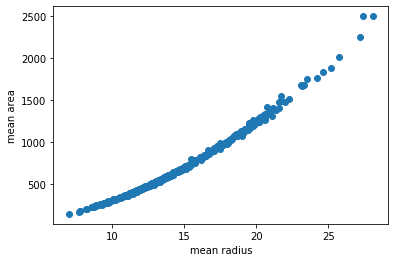

{'coefficients': array([[97.89195962]]), 'intercept': array([-727.25054841]), 'mean squared error': 3255.243809070085, 'r2 score': 0.9727214570731438}


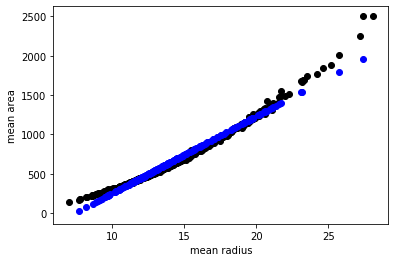

In [7]:
def linear_regression(bunchobject, x_index, y_index, size, seed):
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(bunchobject.data[:,[x_index] ], \
                                                    bunchobject.data[:,[y_index] ], \
                                                    test_size = size)
    
    from sklearn import linear_model 
    regr = linear_model.LinearRegression()    # create an object
    regr.fit(x_train,y_train)                 # obtain a function for regr object
    y_pred = regr.predict(x_test)
    
    from sklearn.metrics import mean_squared_error, r2_score
    results = {'coefficients': 0, 'intercept': 0, 'mean squared error': 0, 'r2 score': 0}
    results['coefficients'] = regr.coef_
    results['intercept'] = regr.intercept_
    results['mean squared error'] = mean_squared_error(y_pred, y_test)
    results['r2 score'] = r2_score(y_pred, y_test)
    
    return x_train, y_train, x_test, y_pred, results

def plot_linear_regression(x1,y1,x2,y2,x_label='',y_label=''):
    plt.scatter(x1,y1, color = 'black')
    plt.scatter(x2,y2, color = 'blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
# test code
from sklearn.datasets import load_breast_cancer
bunchobject = load_breast_cancer()
    
x_index = 0
y_index = 3
x = bunchobject.data[:,[x_index] ]
y = bunchobject.data[:,[y_index] ]
# percentage_for_test = 0.4    # 40% of data used for test
# seed = 2752

x_label = bunchobject.feature_names[x_index]
y_label = bunchobject.feature_names[y_index]

# plot the original dataset
display_scatter(x,y,x_label,y_label)
x_train, y_train, x_test, y_pred, results = linear_regression(bunchobject, x_index, y_index, 0.4, 2752)
print(results)
plot_linear_regression(x,y,x_test,y_pred,x_label,y_label)